https://www.kaggle.com/datasets/mirichoi0218/insurance/data?select=insurance.csv

***A Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI (body mass index), children, smoker and region feature, which are independent and charge as a dependent feature.***

***I will predict individual medical costs billed by health insurance.***

***The prediction itself is based on my true data, except for my location in the United States***



***Columns***

***age:*** age of primary beneficiary

***sex:*** insurance contractor gender, female, male

***bmi:*** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

***children:*** Number of children covered by health insurance / Number of dependents

***smoker:*** Smoking

***region:*** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

***charges:*** Individual medical costs billed by health insurance

In [27]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/Insurance/insurance.csv'
df_data = pd.read_csv(path_file)

df_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
df_data.shape

(1338, 7)

In [30]:
df_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df_data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df_data.duplicated().sum()

1

In [35]:
df_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df_data.duplicated().sum()

1

In [37]:
df_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
df_data.shape

(1338, 7)

In [39]:
df_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
df_data.replace({'sex': {'male': 0, 'female': 1},
                 'smoker': {'yes': 0, 'no': 1},
                 'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}},
                inplace=True)

<ipython-input-40-cd83370579f1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data.replace({'sex': {'male': 0, 'female': 1},


In [41]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [42]:
corr_matrix = df_data.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


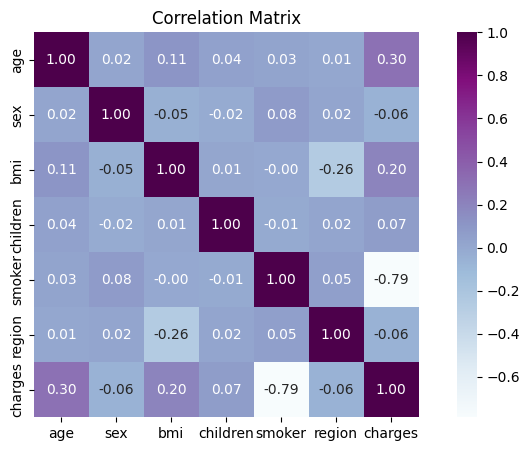

In [63]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [44]:
corr_charges = corr_matrix['charges'].sort_values(ascending=False)
corr_charges

,charges
charges,1.000000
age,0.299008
bmi,0.198341
children,0.067998
region,-0.056993
sex,-0.057292
smoker,-0.787251


In [45]:
df_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [46]:
X = df_data.drop('charges', axis=1).values
y = df_data['charges'].values

print(X.shape)
print(y.shape)


(1338, 6)
(1338,)


In [47]:
from sklearn.preprocessing import StandardScaler


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

lin_reg_model.score(X_test, y_test)


0.783021587162344

In [49]:
y_train_pred = lin_reg_model.predict(X_train)
y_test_pred = lin_reg_model.predict(X_test)

print(f"Intercept: {lin_reg_model.intercept_:.4f}")
print(f"Coefficients: {lin_reg_model.coef_}")

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

Intercept: 11091.5999
Coefficients: [ 2.56625541e+02  1.71347528e+01  3.35095743e+02  4.22627296e+02
 -2.36724982e+04  1.65804576e+02]
Training MAE: 4214.8974, MSE: 37337214.4108, R²: 0.7413
Testing MAE: 4190.2202, MSE: 33685623.3541, R²: 0.7830


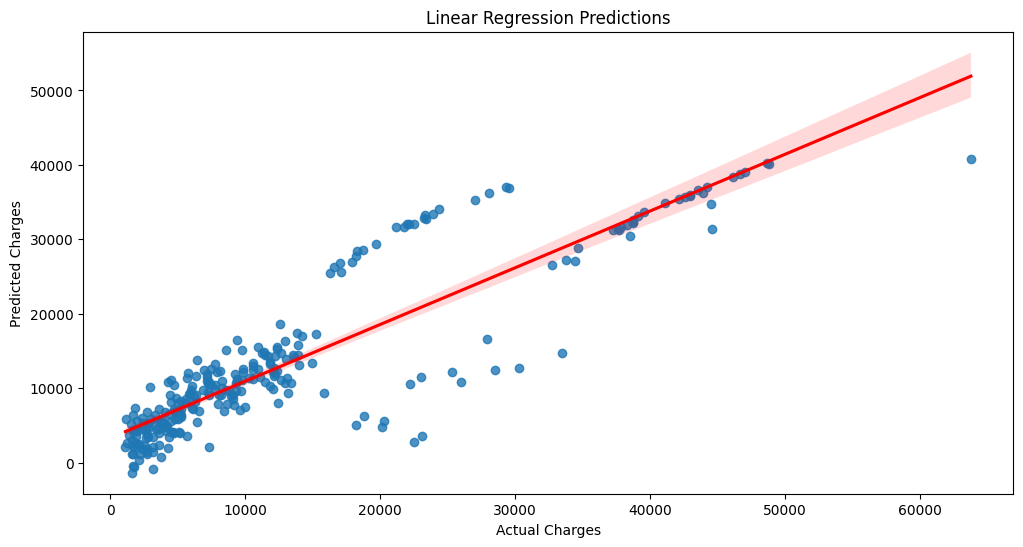

In [50]:
plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [66]:
input_data = (35, 1, 18.5, 1, 1, 0)
input_data_reshaped = np.asarray(input_data).reshape(1,-1)
prediction = lin_reg_model.predict(input_data_reshaped)

print('The insurance cost in the USD is', prediction[0])

The insurance cost in the USD is 3040.0289531174913
